In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.metrics import log_loss
import joblib
from sklearn.utils import resample

In [2]:
df=pd.read_csv('movie_metadata.csv')

In [3]:
df.shape

(5043, 28)

In [4]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [6]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [8]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [9]:
df_dup=df[df.duplicated()]
df_dup

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000
395,Color,Rob Cohen,187.0,106.0,357.0,4000.0,Vin Diesel,23000.0,144512310.0,Action|Crime|Thriller,...,988.0,English,USA,PG-13,38000000.0,2001.0,14000.0,6.7,2.35,14000
590,Color,Brett Ratner,245.0,101.0,420.0,467.0,Rufus Sewell,12000.0,72660029.0,Action|Adventure,...,269.0,English,USA,PG-13,100000000.0,2014.0,3000.0,6.0,2.35,21000
656,Color,Paul Verhoeven,196.0,113.0,719.0,217.0,Rachel Ticotin,605.0,119412921.0,Action|Sci-Fi,...,391.0,English,USA,R,65000000.0,1990.0,308.0,7.5,1.85,0
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
1220,Color,Angelina Jolie Pitt,322.0,137.0,11000.0,465.0,Jack O'Connell,769.0,115603980.0,Biography|Drama|Sport|War,...,351.0,English,USA,PG-13,65000000.0,2014.0,698.0,7.2,2.35,35000


In [10]:
total_duplicates = df.duplicated().sum()
print("Total duplicate rows:", total_duplicates)

Total duplicate rows: 45


dropping the duplicates

In [52]:
df=df.drop_duplicates()

In [11]:
df.shape

(5043, 28)

imputing data

imputing categorical  columns with mode 


In [12]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [13]:
categorical_cols=['color', 'director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name', 'plot_keywords', 'language', 'country', 'content_rating']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12128\264144515.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


imputing numerical cols with mean

In [14]:
numerical_cols = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
                  'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'facenumber_in_poster',
                  'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12128\1490872578.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Saving clean dataset


In [15]:
df.to_csv("movie_metadata_cleaned.csv", index=False)
print("Missing values imputed and saved as 'movie_metadata_cleaned.csv'")

Missing values imputed and saved as 'movie_metadata_cleaned.csv'


In [16]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

Here we are categorizing the target variable in such a way that IMDB score between 1 and 3 is FLOP , between 3 and 6 is AVG, between 6 and 10 is HIT.

In [17]:
bins=[1,3,6,10]
lables=['flop','avg','hit']
df['imdb_bin']=pd.cut(df['imdb_score'], bins=bins, labels=lables)

In [18]:
df.shape

(5043, 29)

In [19]:
df['imdb_bin'].value_counts()

imdb_bin
hit     3458
avg     1539
flop      46
Name: count, dtype: int64

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12128\3584268652.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['imdb_bin']).size().plot(kind="bar",fontsize=10)


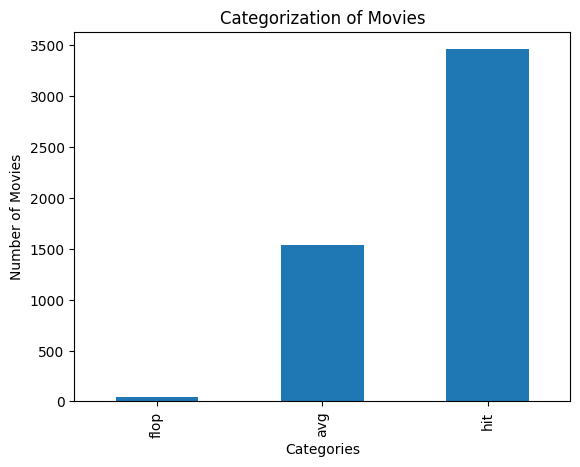

In [21]:
df.groupby(['imdb_bin']).size().plot(kind="bar",fontsize=10)
plt.xlabel('Categories')
plt.ylabel('Number of Movies')
plt.title('Categorization of Movies')
plt.draw()
plt.show()

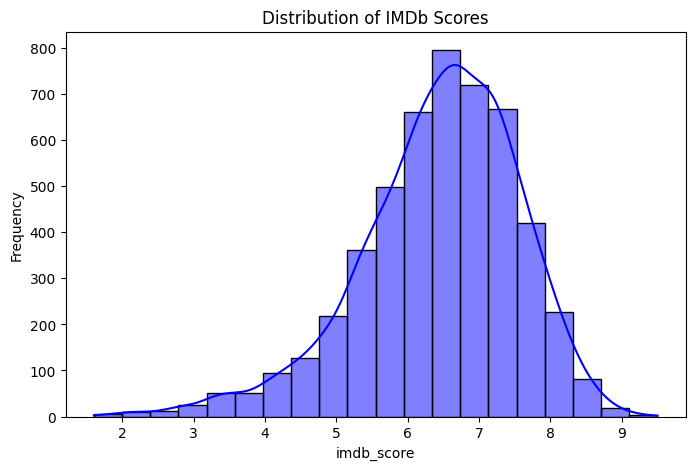

In [22]:
# Histogram of IMDb scores
plt.figure(figsize=(8,5))
sns.histplot(df['imdb_score'], bins=20, kde=True, color='blue')
plt.title('Distribution of IMDb Scores')
plt.xlabel('imdb_score')
plt.ylabel('Frequency')
plt.draw()
plt.show()

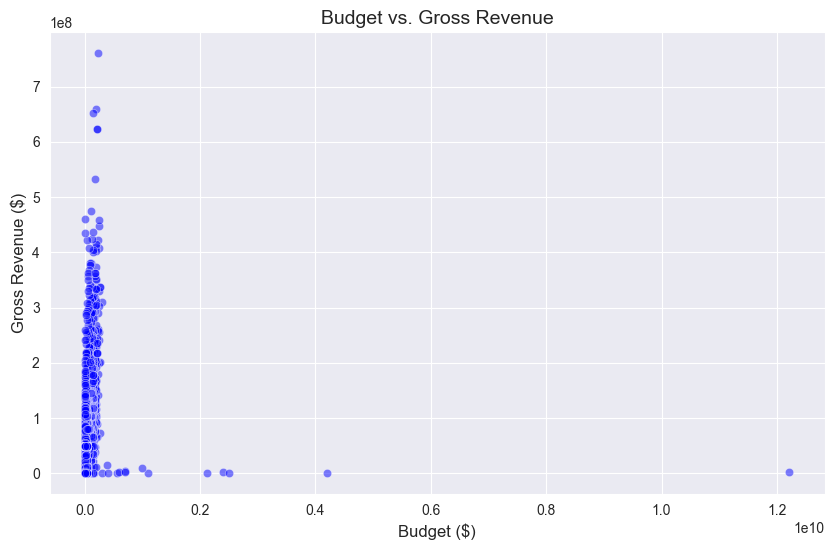

In [23]:
# Set plot style
sns.set_style("darkgrid")

# Create figure and axis
plt.figure(figsize=(10, 6))

# Scatter plot for Budget vs. Gross Revenue
sns.scatterplot(x=df["budget"], y=df["gross"], alpha=0.5, color="blue")

# Titles and labels
plt.title("Budget vs. Gross Revenue", fontsize=14)
plt.xlabel("Budget ($)", fontsize=12)
plt.ylabel("Gross Revenue ($)", fontsize=12)

# Show plot
plt.show()


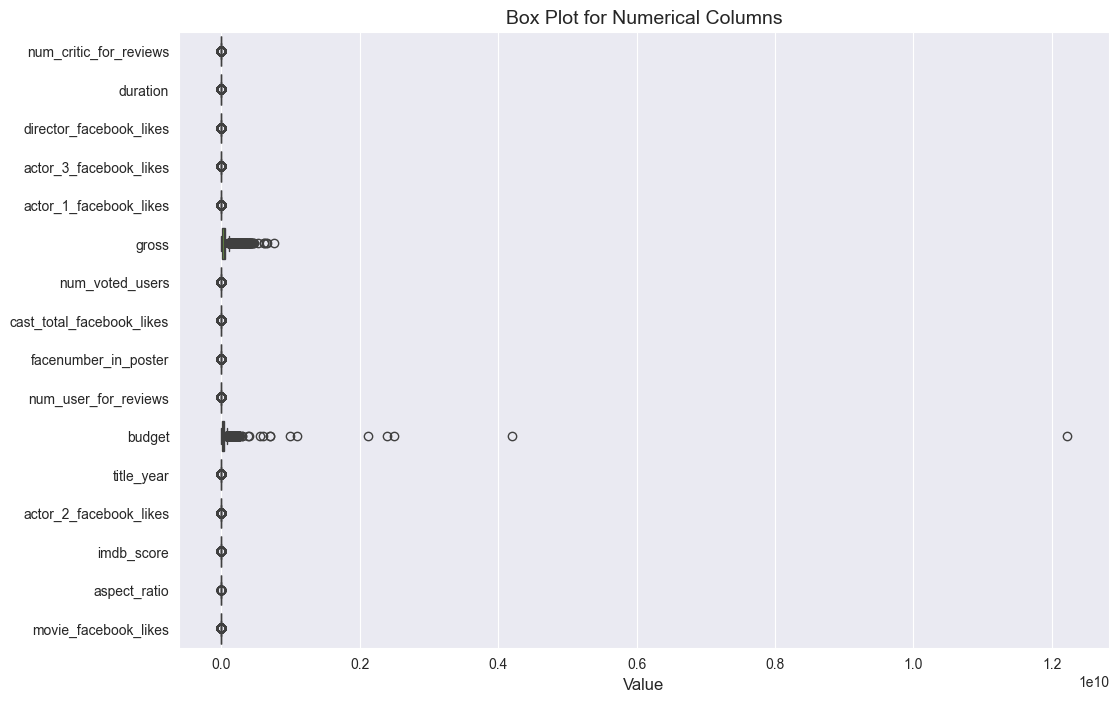

In [24]:
# Set plot style
sns.set_style("darkgrid")

# Select numerical columns
numeric_cols = df.select_dtypes(include=["number"]).columns

# Create figure and axis
plt.figure(figsize=(12, 8))

# Box plot for all numerical columns
sns.boxplot(data=df[numeric_cols], orient="h")

# Titles and labels
plt.title("Box Plot for Numerical Columns", fontsize=14)
plt.xlabel("Value", fontsize=12)

# Show plot
plt.show()

dropping unnecessary columns

In [25]:
df.drop(columns=['movie_title','movie_imdb_link'],inplace=True)

label encoding all the text and categorical columns

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['color', 'director_name', 'actor_2_name',
        'genres', 'actor_1_name',
        'actor_3_name',
        'plot_keywords',
        'language', 'country', 'content_rating',
       'title_year', 'aspect_ratio']
df[cat_list]=df[cat_list].apply(lambda x:le.fit_transform(x))

correlation

In [27]:
df_for_corre= df.drop(columns=["imdb_bin"])

<Axes: >

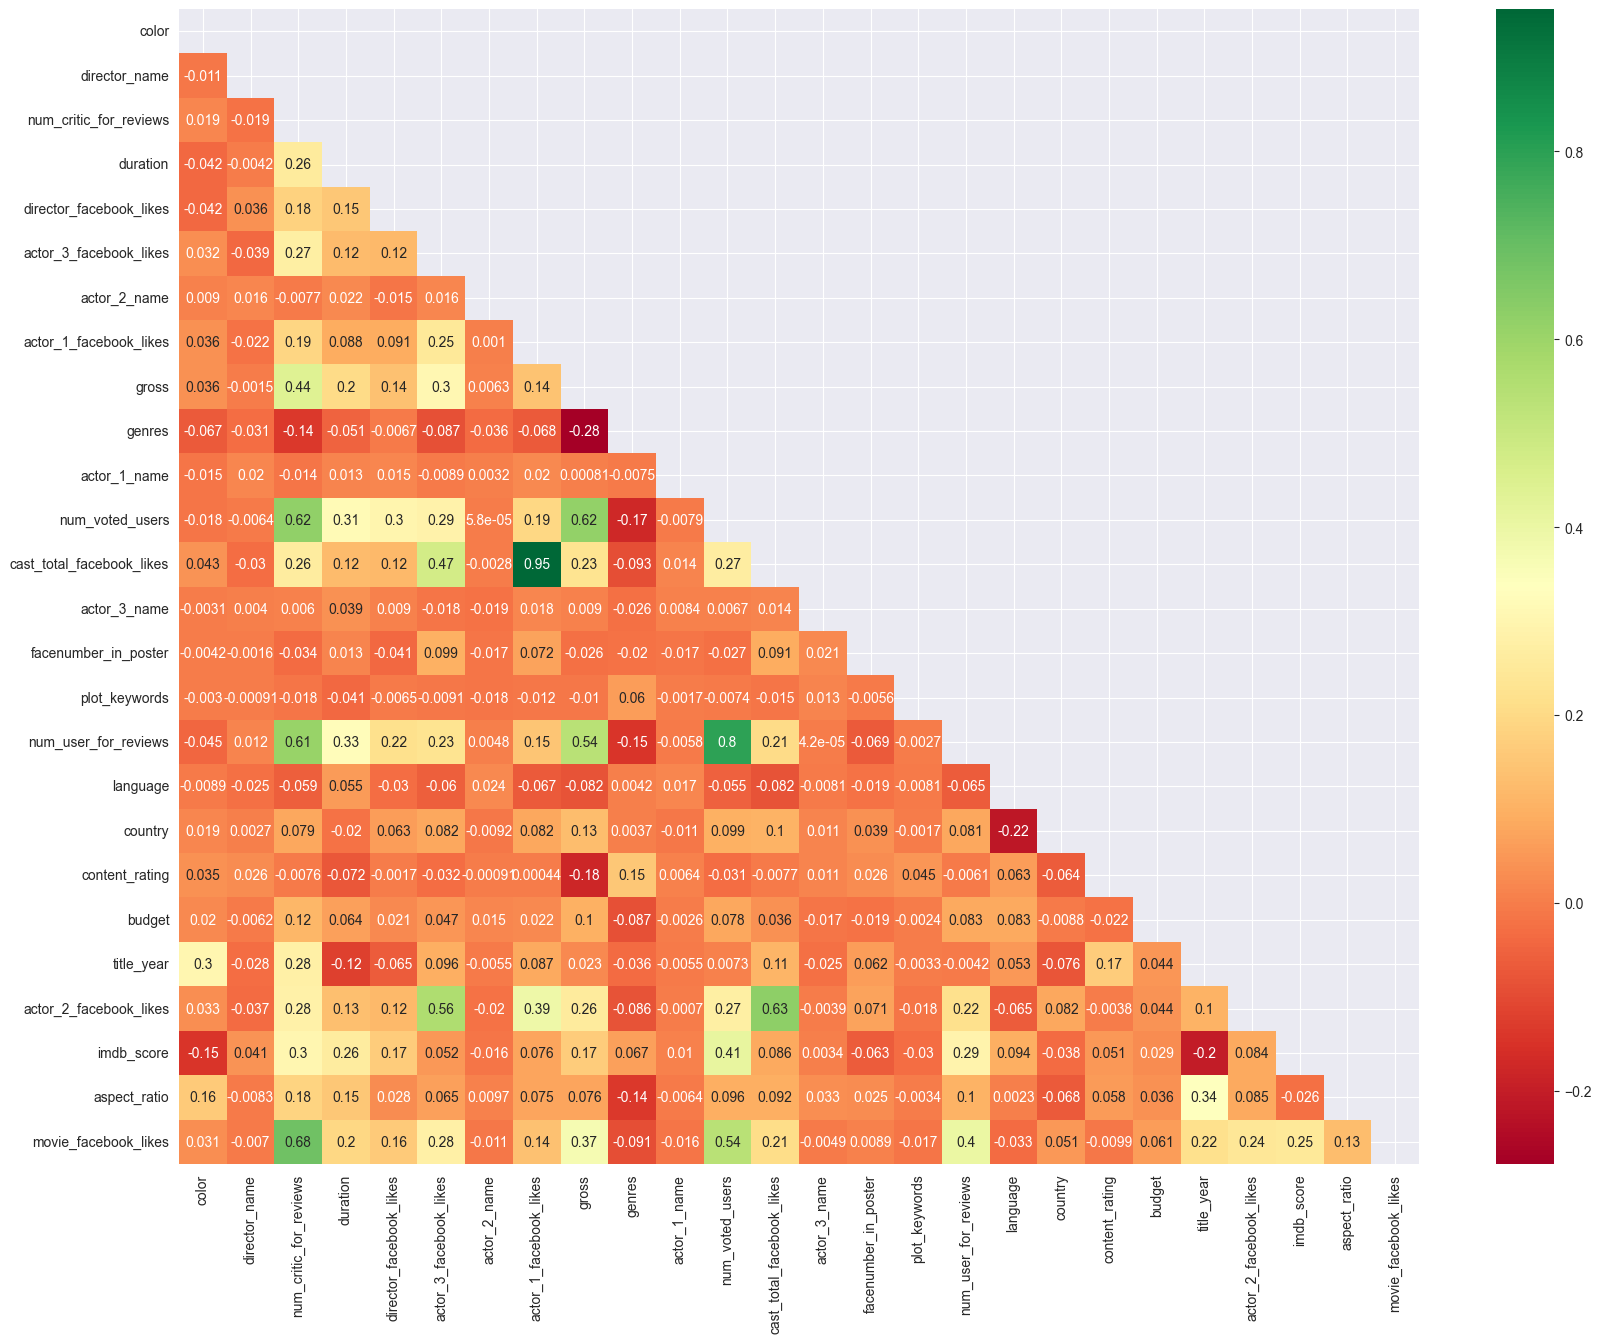

In [28]:
#checking multicollineariaty
corr = df_for_corre.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

In [29]:
#Removing few columns due to multicollinearity and imdb_score 
df.drop(columns=['cast_total_facebook_likes','num_critic_for_reviews','num_user_for_reviews'], axis=1,inplace=True)

In [30]:
df.columns

Index(['color', 'director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'num_voted_users', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'imdb_bin'],
      dtype='object')

In [31]:
df.drop(columns=['color','plot_keywords','language','imdb_score','title_year'], axis=1,inplace=True)

In [32]:
df.shape

(5043, 19)

In [33]:
df.columns

Index(['director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'num_voted_users', 'actor_3_name',
       'facenumber_in_poster', 'country', 'content_rating', 'budget',
       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes',
       'imdb_bin'],
      dtype='object')

In [34]:
#handling categorial data
df.dtypes

director_name                 int64
duration                    float64
director_facebook_likes     float64
actor_3_facebook_likes      float64
actor_2_name                  int64
actor_1_facebook_likes      float64
gross                       float64
genres                        int64
actor_1_name                  int64
num_voted_users               int64
actor_3_name                  int64
facenumber_in_poster        float64
country                       int64
content_rating                int64
budget                      float64
actor_2_facebook_likes      float64
aspect_ratio                  int64
movie_facebook_likes          int64
imdb_bin                   category
dtype: object

Define feature variables (X) and target variable (y)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [36]:
X = df.drop(columns=['imdb_bin'])
y= df['imdb_bin']

In [37]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape)
print(y.shape)

(5043, 18)
(5043,)


In [38]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [39]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

c:\Users\LENOVO\.conda\envs\project1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\.conda\envs\project1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\.conda\envs\project1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.78
Confusion Matrix:
 [[148   0 155]
 [  5   0   8]
 [ 58   0 635]]
Classification Report:
               precision    recall  f1-score   support

         avg       0.70      0.49      0.58       303
        flop       0.00      0.00      0.00        13
         hit       0.80      0.92      0.85       693

    accuracy                           0.78      1009
   macro avg       0.50      0.47      0.48      1009
weighted avg       0.76      0.78      0.76      1009



In [42]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.71
Confusion Matrix:
 [[145   0 158]
 [  4   0   9]
 [126   0 567]]
Classification Report:
               precision    recall  f1-score   support

         avg       0.53      0.48      0.50       303
        flop       0.00      0.00      0.00        13
         hit       0.77      0.82      0.79       693

    accuracy                           0.71      1009
   macro avg       0.43      0.43      0.43      1009
weighted avg       0.69      0.71      0.70      1009



c:\Users\LENOVO\.conda\envs\project1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\.conda\envs\project1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\.conda\envs\project1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
# Initialize SVM Classifier (Using Radial Basis Function (RBF) Kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.69
Confusion Matrix:
 [[  0   0 303]
 [  0   0  13]
 [  0   0 693]]
Classification Report:
               precision    recall  f1-score   support

         avg       0.00      0.00      0.00       303
        flop       0.00      0.00      0.00        13
         hit       0.69      1.00      0.81       693

    accuracy                           0.69      1009
   macro avg       0.23      0.33      0.27      1009
weighted avg       0.47      0.69      0.56      1009



c:\Users\LENOVO\.conda\envs\project1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\.conda\envs\project1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\.conda\envs\project1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Weak learner
    n_estimators=50,  # Number of weak classifiers
    learning_rate=1.0,  # Step size
    random_state=42
)

#  Train the model before using it

adaboost_model.fit(X_train, y_train)

# Now use the model for predictions
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.70
Confusion Matrix:
 [[119   0 184]
 [  3   0  10]
 [103   0 590]]
Classification Report:
               precision    recall  f1-score   support

         avg       0.53      0.39      0.45       303
        flop       0.00      0.00      0.00        13
         hit       0.75      0.85      0.80       693

    accuracy                           0.70      1009
   macro avg       0.43      0.41      0.42      1009
weighted avg       0.68      0.70      0.68      1009



c:\Users\LENOVO\.conda\envs\project1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\.conda\envs\project1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\.conda\envs\project1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


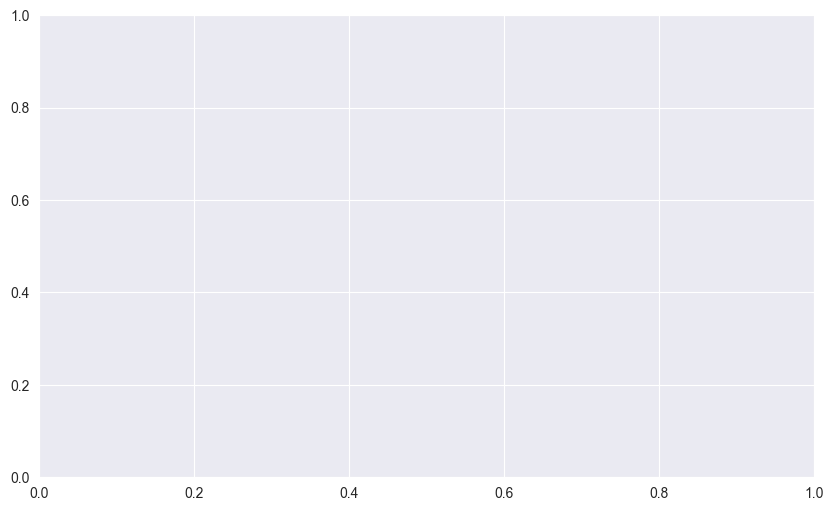

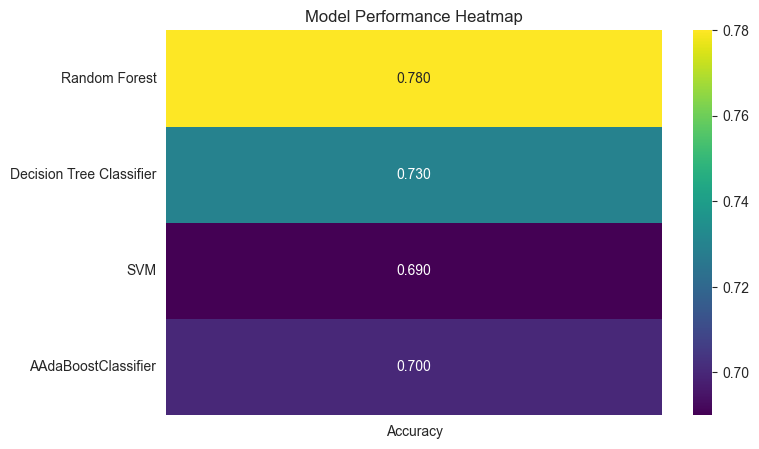

In [46]:
# Data
models = ["Random Forest", "Decision Tree Classifier","SVM","AAdaBoostClassifier"]
accuracy = [0.78, 0.73, 0.69, 0.70]

# Create DataFrame for heatmap
data = {
    "Accuracy": accuracy
}
df = pd.DataFrame(data, index=models)

# Bar Plot (Grouped)
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2
# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df, annot=True, cmap="viridis", fmt=".3f")
plt.title("Model Performance Heatmap")
plt.show()